Импорт библиотек

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
import numpy as np


def sum_prod(X: list[np.array], V: list[np.array]) -> np.array:
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    s = 0
    for matrix in X:
        for vector in V:
            s += matrix.dot(vector)
    return s


result: np.array = sum_prod([np.array([[1,1,1], [1,1,1]])], [np.array([1,2,3]), np.array([1,2,3])])
assert np.array_equal(result, np.array([12, 12]))



<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
def binarize(M: np.array, threshold=0.5):
    return np.where(M > threshold, 1, 0)

arr = binarize(np.array([[1,2,3], [1,2,3]]), 2)
assert np.array_equal(arr, np.array([[0,0,1],[0,0,1]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [23]:
def unique_rows(mat: np.array):
    rows = []
    for row in mat:
        rows.append(set(row))
    return rows

def unique_columns(mat):
    columns = []
    for column in mat.T:
        columns.append(set(column))
    return columns


arr = np.array(
    [[1,1,2,2],
    [3,3,3,1]]
)
assert unique_rows(arr) == [{1,2}, {1,3}]
arr2 = np.array([
    [1,2,3],
    [1,3,2],
    [2,2,3]
])
assert unique_columns(arr2) == [{1,2}, {2,3}, {2,3}]

Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

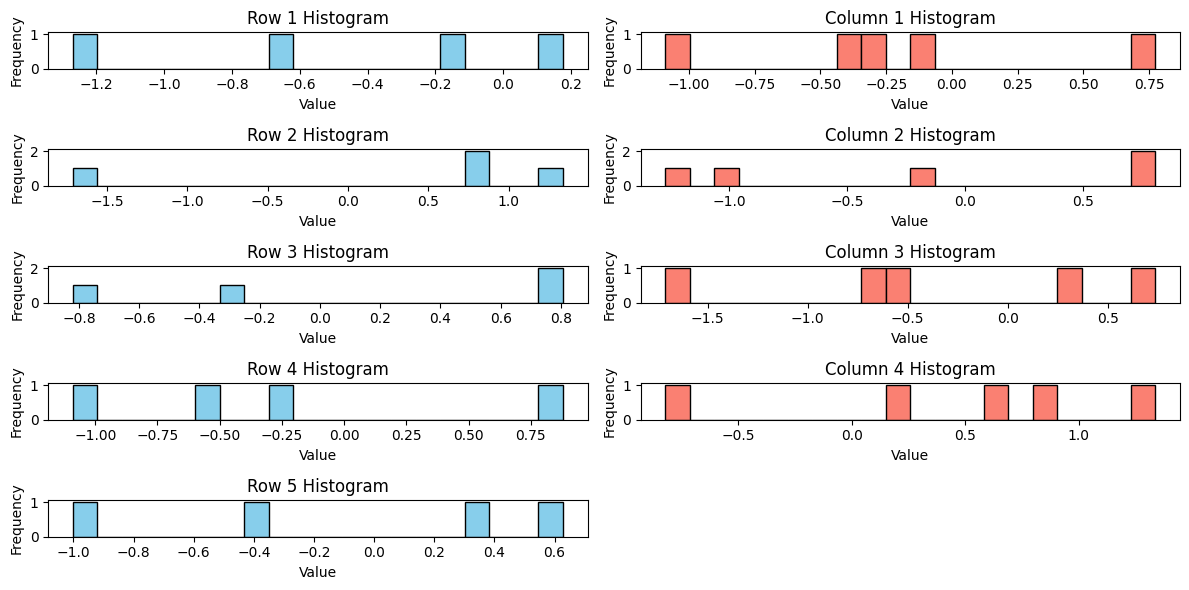

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix_normal_distribution(m, n):
    matrix = np.random.randn(m, n)
    row_means = np.mean(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    row_vars = np.var(matrix, axis=1)
    col_vars = np.var(matrix, axis=0)

    plt.figure(figsize=(12, 6))
    for i in range(m):
        plt.subplot(m, 2, 2*i+1)
        plt.hist(matrix[i], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Row {i+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    for j in range(n):
        plt.subplot(m, 2, 2*j+2)
        plt.hist(matrix[:, j], bins=20, color='salmon', edgecolor='black')
        plt.title(f'Column {j+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return row_means, col_means, row_vars, col_vars

m = 5
n = 4
row_means, col_means, row_vars, col_vars = fill_matrix_normal_distribution(m, n)

Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [32]:
def chess(m, n, a, b):
    list_0_1 = np.array([ [a, b], [b, a] ])
    checkerboard = np.tile(list_0_1, ( n//2, m//2)) 
    return checkerboard


result = chess(4, 4, 1, 2)
np.array_equal(
    result,
    np.array(
        [
            [1, 2, 1, 2],
            [2, 1, 2, 1],
            [1, 2, 1, 2],
            [2, 1, 2, 1]
        ]
    ),
)


(4, 4)


True

Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

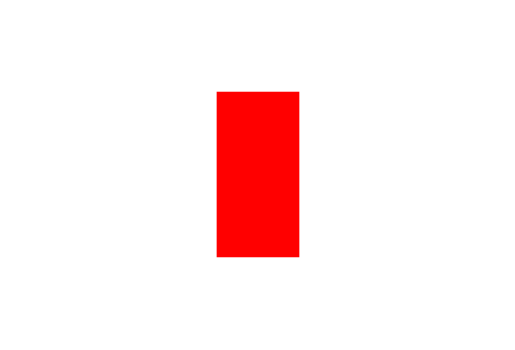

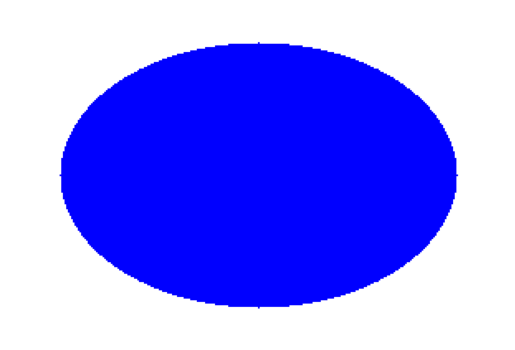

In [39]:
def draw_rectangle(image, m, n, a, b, bg_color, rect_color):
    image[:, :] = bg_color
    image[m//2 - a//2 : m//2 + a//2, n//2 - b//2 : n//2 + b//2] = rect_color
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def draw_ellipse(image, m, n, a, b, bg_color, ellipse_color):
    image[:, :] = bg_color
    x, y = np.meshgrid(np.arange(n), np.arange(m))
    ellipse = ((x - n//2)**2 / a**2 + (y - m//2)**2 / b**2) <= 1
    image[ellipse] = ellipse_color
    plt.imshow(image)
    plt.axis("off")
    plt.show()

m = 200
n = 300
image = np.zeros((m, n, 3), dtype=np.uint8)  # Пустая страницы
bg_color = (255, 255, 255)
rect_color = (255, 0, 0)
ellipse_color = (0, 0, 255)

draw_rectangle(image, m, n, 100, 50, bg_color, rect_color)
draw_ellipse(image, m, n, 120, 80, bg_color, ellipse_color)

Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [40]:
def calculate_statistics(time_series: np.array):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    
    local_maxima = np.where((time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    local_minima = np.where((time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:]))[0] + 1
    
    return mean, variance, std_dev, local_maxima, local_minima

def moving_average(time_series: np.array, p: int):
    moving_avg = np.convolve(time_series, np.ones(p), "valid") / p
    return np.concatenate((np.full(p-1, np.nan), moving_avg))

time_series = np.array([3, 5, 2, 8, 1, 4, 7, 6, 9, 2])
p = 3

mean, variance, std_dev, local_maxima, local_minima = calculate_statistics(time_series)
moving_avg_series = moving_average(time_series, p)

print("Мат ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", std_dev)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)
print("Среднее с окном", p, ":", moving_avg_series)



Мат ожидание: 4.7
Дисперсия: 6.8100000000000005
СКО: 2.6095976701399777
Локальные максимумы: [1 3 6 8]
Локальные минимумы: [2 4 7]
Среднее с окном 3 : [       nan        nan 3.33333333 5.         3.66666667 4.33333333
 4.         5.66666667 7.33333333 5.66666667]


Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [33]:
def make_one_hot_encoding(vec: np.array):
    result = np.array([[0] * (max(vec) + 1)] * len(vec))
    for num, row in zip(vec, result):
        row[num] = 1
    return result


result = make_one_hot_encoding(np.array([0, 2, 3, 0]))
expected = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0,],
])
assert np.array_equal(result, expected)